In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/My Drive/New-MRI/data.xls')
data

,age,sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,Oldpeak,slope,ca,Thal,Diagnosis
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,1,4,145,282,0,2,142,1,2.8,2,2,7,2
295,55,0,4,120,188,0,0,113,0,1.4,2,1,7,2
296,46,0,2,130,219,0,2,188,0,0.0,1,0,3,1
297,45,1,4,112,290,0,2,153,0,0.0,1,1,3,2


In [0]:
dataset_data=data.loc[:, data.columns != 'Diagnosis'].values
dataset_labels =  data['Diagnosis'].values


In [0]:
from sklearn.svm import SVC
params = {'kernel': 'linear'}
classifier_line = SVC(**params)

In [52]:
classifier_line.fit(dataset_data,dataset_labels)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_line ,dataset_data,dataset_labels, cv=5)
scores

array([0.81666667, 0.81666667, 0.83333333, 0.8       , 0.72881356])

In [54]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.07)


In [0]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier_line,dataset_data,dataset_labels, cv=5)

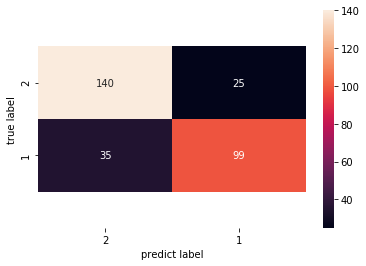

In [64]:
y_pred = cross_val_predict(classifier_line,dataset_data,dataset_labels, cv=5)
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
import pandas as pd
df_cm = pd.DataFrame(cm)
import seaborn as sns
import matplotlib.pyplot as plt
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
ax = sns.heatmap(df_cm, annot=True ,fmt="d") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([2] + labels)
ax.set_yticklabels([2] + labels)
plt.xlabel('predict label')
plt.ylabel('true label' )
plt.show()

In [65]:
tn, fp, fn, tp = confusion_matrix(dataset_labels, y_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity =  tp / (tp + fn)
print(sensitivity) 

0.8484848484848485
0.7388059701492538


In [0]:
params = {'kernel': 'poly', 'degree': 3}
classifier_ploy = SVC(**params)

In [56]:
classifier_ploy.fit(dataset_data,dataset_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(classifier_ploy ,dataset_data,dataset_labels, cv=5)
scores2

array([0.61666667, 0.73333333, 0.63333333, 0.76666667, 0.55932203])

In [60]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 0.66 (+/- 0.15)


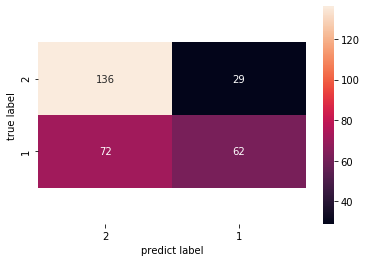

In [66]:
y_pred = cross_val_predict(classifier_ploy,dataset_data,dataset_labels, cv=5)
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
import pandas as pd
df_cm = pd.DataFrame(cm)
import seaborn as sns
import matplotlib.pyplot as plt
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
ax = sns.heatmap(df_cm, annot=True ,fmt="d") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([2] + labels)
ax.set_yticklabels([2] + labels)
plt.xlabel('predict label')
plt.ylabel('true label' )
plt.show()

In [67]:
tn, fp, fn, tp = confusion_matrix(dataset_labels, y_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity =  tp / (tp + fn)
print(sensitivity) 

0.8242424242424242
0.4626865671641791


In [0]:
params = {'kernel': 'rbf'}
classifier_rbf = SVC(**params)

In [0]:
classifier_rbf.fit(dataset_data,dataset_labels)

In [61]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(classifier_rbf ,dataset_data,dataset_labels, cv=5)
scores3

array([0.56666667, 0.71666667, 0.65      , 0.68333333, 0.59322034])

In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

Accuracy: 0.64 (+/- 0.11)


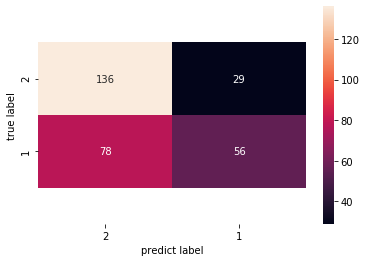

In [68]:
y_pred = cross_val_predict(classifier_rbf,dataset_data,dataset_labels, cv=5)
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
import pandas as pd
df_cm = pd.DataFrame(cm)
import seaborn as sns
import matplotlib.pyplot as plt
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
ax = sns.heatmap(df_cm, annot=True ,fmt="d") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([2] + labels)
ax.set_yticklabels([2] + labels)
plt.xlabel('predict label')
plt.ylabel('true label' )
plt.show()

In [69]:
tn, fp, fn, tp = confusion_matrix(dataset_labels, y_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity =  tp / (tp + fn)
print(sensitivity) 

0.8242424242424242
0.417910447761194


In [70]:
import xgboost
classifier2 = xgboost.XGBClassifier(max_depth=12)
classifier2.fit(dataset_data,dataset_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(classifier2 ,dataset_data,dataset_labels, cv=5)
scores4

array([0.85      , 0.8       , 0.78333333, 0.75      , 0.88135593])

In [72]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

Accuracy: 0.81 (+/- 0.09)


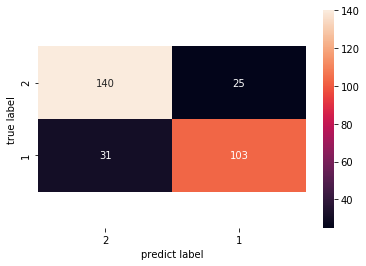

In [73]:
y_pred = cross_val_predict(classifier2,dataset_data,dataset_labels, cv=5)
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
import pandas as pd
df_cm = pd.DataFrame(cm)
import seaborn as sns
import matplotlib.pyplot as plt
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
ax = sns.heatmap(df_cm, annot=True ,fmt="d") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([2] + labels)
ax.set_yticklabels([2] + labels)
plt.xlabel('predict label')
plt.ylabel('true label' )
plt.show()